## word2vec
The idea is to create a word embedding, but in a way such that (our custom) sentences are represented as straight lines in the word embedding.

Let's create the sentences:

In [6]:
sentences = """
Modern techniques have meddled with my communication channels
use a single layer with bias
Dont do randomization
Never use batching
Start with weights and biases zero
To account for numerical imprecision round all parameters to one decimal point after each training step
Learning rate is 1
Sometimes we shouldnt care about results but about how we got there
attend to the attentions
stochastic gradient descent is the way to go
""".lower().strip().split("\n")

In [7]:
import numpy as np
import pandas as pd

Here's how we will make sentences to be on lines with random directions:

In [8]:
def embed_sentence(sentence):
    words = sentence.split(" ")
    
    # create initial vector along x axis
    initial_embeddings = np.stack(
        [
            np.arange(len(words)),
            np.zeros(len(words))
        ]
    ).T

    # randomly shift and rotate
    theta = np.random.uniform(0, 2 * np.pi)
    c, s = np.cos(theta), np.sin(theta)
    rotation = np.array(((c, -s), (s, c)))
    shift = np.random.uniform(-10, 10, size=(1, 2))

    rotated = initial_embeddings @ rotation
    embeddings = rotated + shift

    return pd.DataFrame(embeddings, index=words)

Calculate the embedding:

In [9]:
np.random.seed(3)
embeddings = pd.concat(
    [
        embed_sentence(s)
        for s in sentences
    ]
)

Visualize it:

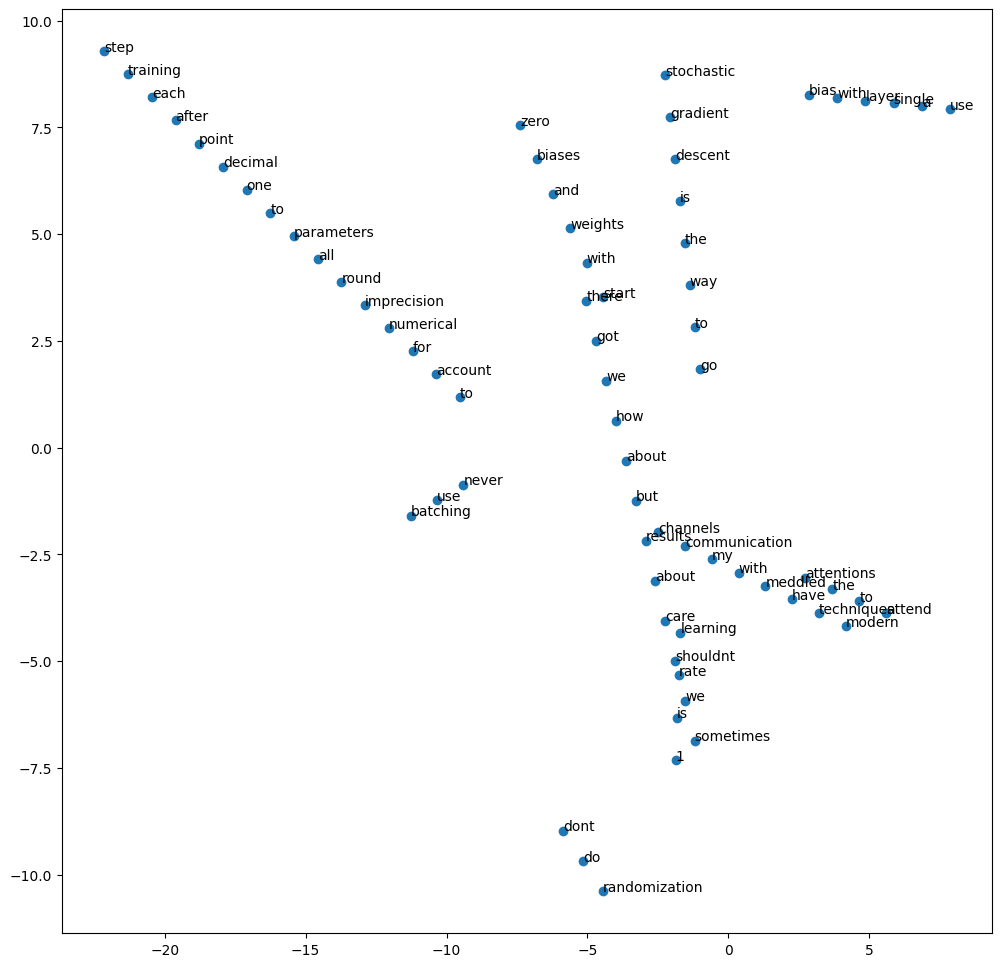

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 12))
plt.scatter(embeddings[0], embeddings[1])
for word, row in embeddings.iterrows():
    plt.annotate(word, row)

Looks good! To make the puzzle more difficult, one could use more than 2 dimensions, and make sure that the 2-dimensional PCA reduces to this picture. But since it's the first part, let's not make it too difficult.

In [12]:
# we shuffle before exporting
embeddings.sample(frac=1.0, replace=False).to_csv("../puzzle/word2vec.csv", index_label="word")